Class: Summer Machine Learning Class 2025 (STEMPEERS)
Instructor: Bhishan Poudel
Programmer: Pragya Saxena
Date: 8/3/25

Decision Tree Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
|--- sex <= 0.50
|   |--- age <= 3.50
|   |   |--- sibsp <= 3.00
|   |   |   |--- class: 1
|   |   |--- sibsp >  3.00
|   |   |   |--- class: 0
|   |--- age >  3.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 2.50
|   |   |   |--- class: 0
|   |   |--- age >  2.50
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- age <= 27.50
|   |   |   |--- class: 1
|   |   |--- age >  27.50
|   |   |   |--- class: 0



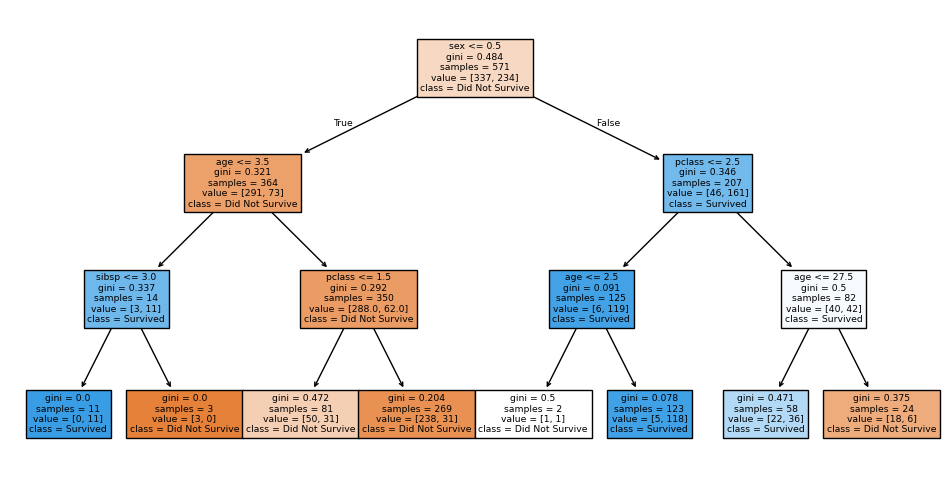

Model accuracy: 0.74


In [2]:
import pandas as pd
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)

df = df[["survived", "pclass", "sex", "age", "fare", "sibsp", "parch"]]
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df = df.dropna(subset=["pclass", "sex", "age", "fare", "sibsp", "parch"])
features = ["pclass", "sex", "age", "fare", "sibsp", "parch"]
target = "survived"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=features, class_names=["Did Not Survive", "Survived"], filled=True)
plt.show()
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Logistic Regression Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



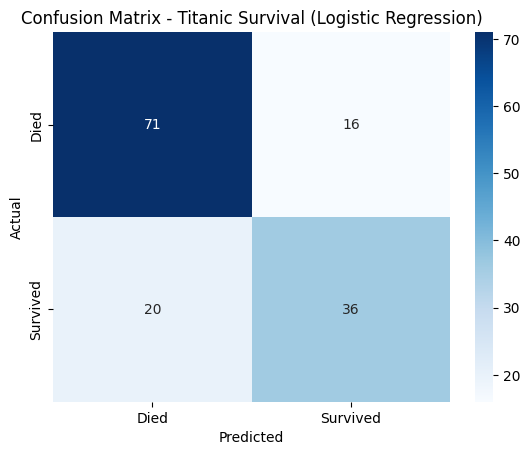

Model Accuracy: 0.75


In [4]:
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)

df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = df.dropna()
X = df[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Died", "Survived"],
            yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival (Logistic Regression)")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Random Forest

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1645871263.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


Accuracy: 0.7832167832167832

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.74      0.70      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

|--- sex <= 0.50
|   |--- age <= 3.50
|   |   |--- parch <= 3.00
|   |   |   |--- class: 1
|   |   |--- parch >  3.00
|   |   |   |--- class: 0
|   |--- age >  3.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 2.50
|   |   |   |--- class: 0
|   |   |--- age >  2.50
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- age <= 27.50
|   |   |   |--- class: 1
|   |   |--- age >  27.50
|   |   |   |--- class: 0



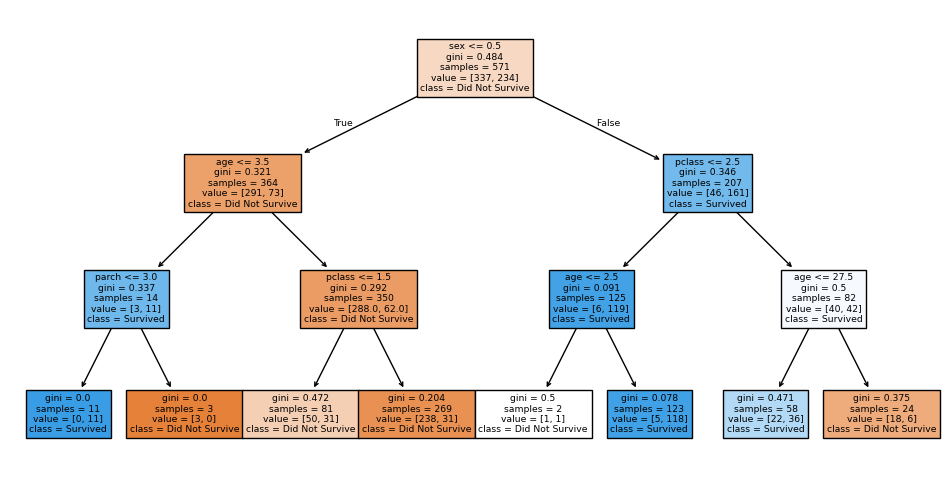

Model accuracy: 0.78


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)

df['age'].fillna(df['age'].median(), inplace=True)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
df = df.dropna(subset=['survived'] + features)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=features, class_names=["Did Not Survive", "Survived"], filled=True)
plt.show()
accuracy = rf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")